In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **LOAD DATASET**

In [2]:
# Fungsi untuk menghapus 'val:' dan '[UNIT]' serta konversi ke float
def clean_value(value):
    if isinstance(value, str):  # Pastikan nilai adalah string
        # Hapus 'val:' jika ada
        if 'val:' in value:
            value = value.replace('val:', '').strip()
        # Hapus '[UNIT]' jika ada
        if '[UNIT]' in value:
            value = value.replace('[UNIT]', '').strip()
        # Coba konversi ke float
        try:
            return float(value)
        except ValueError:
            return value  # Kembalikan asli jika gagal konversi
    # Jika bukan string (misalnya sudah float), kembalikan apa adanya
    try:
        return float(value)
    except (ValueError, TypeError):
        return value  # Kembalikan asli jika gagal konversi

In [3]:
dataset_df = pd.read_csv('./dataset/combined_train_dataset.csv')
dataset_df['DTC'] = dataset_df['DTC'].apply(clean_value)
dataset_df.drop(columns=['filename','file_name'],inplace=True)
dataset_df.dropna(subset=['Lithology_code'], inplace=True)

In [4]:
dataset_df.head()

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
7442,65000.0,NaN,8.5,NaN,NaN,NaN,NaN,56.905998,100.044289,1.689291,...,NaN,NaN,NaN,NaN,455221.34375,8.023255,1.683155,-2620.580078,73.558113,2645.580001
7443,65000.0,NaN,8.5,NaN,NaN,NaN,NaN,56.792545,100.293167,1.746271,...,NaN,NaN,NaN,NaN,455221.34375,8.024439,1.743812,-2620.731934,73.467598,2645.732002
7444,65000.0,NaN,8.5,NaN,NaN,NaN,NaN,55.627075,100.508331,1.756988,...,NaN,NaN,NaN,NaN,455221.34375,8.025548,1.765278,-2620.884033,72.116478,2645.884002
7445,65000.0,NaN,8.5,NaN,NaN,NaN,NaN,55.470150,100.170883,1.654294,...,NaN,NaN,NaN,NaN,455221.34375,8.026745,1.672552,-2621.035889,69.835365,2646.036002
7446,65000.0,NaN,8.5,NaN,NaN,NaN,NaN,56.290169,99.813011,1.458692,...,NaN,NaN,NaN,NaN,455221.34375,8.027942,1.478103,-2621.187988,67.834320,2646.188002


## **DATA UNDERSTANDING**

In [5]:
# Periksa jumlah baris dan kolom
print(f"Row and Column Shape: {dataset_df.shape}")

Row and Column Shape: (250400, 26)


In [6]:
# Dataset Information
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250400 entries, 7442 to 304280
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Lithology_code  250400 non-null  float64
 1   ROPA            18183 non-null   float64
 2   BS              117679 non-null  float64
 3   PEF             148118 non-null  float64
 4   RXO             67715 non-null   float64
 5   DCAL            70215 non-null   float64
 6   RMIC            23041 non-null   float64
 7   ROP             201089 non-null  float64
 8   SP              187010 non-null  float64
 9   RMED            236639 non-null  float64
 10  GR              249992 non-null  float64
 11  DTC             234361 non-null  float64
 12  MUDWEIGHT       157111 non-null  float64
 13  Y_LOC           249676 non-null  float64
 14  DRHO            208370 non-null  float64
 15  DEPTH_MD        249676 non-null  float64
 16  DTS             13465 non-null   float64
 17  RHOB        

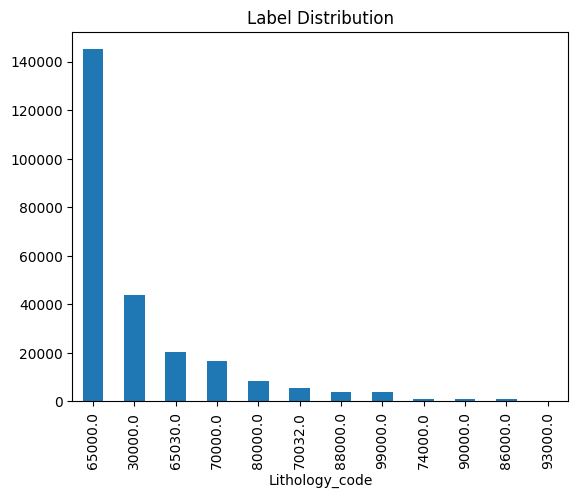

In [7]:
# Periksa jumlah data per label
dataset_df['Lithology_code'].value_counts().plot(kind='bar')
plt.title("Label Distribution")
plt.show()

In [8]:
dataset_df.describe()

,Lithology_code,ROPA,BS,PEF,RXO,DCAL,RMIC,ROP,SP,RMED,...,DTS,RHOB,NPHI,SGR,X_LOC,CALI,RSHA,Z_LOC,RDEP,DEPT
count,250400.000000,18183.000000,117679.000000,148118.000000,67715.000000,70215.000000,23041.000000,201089.000000,187010.000000,236639.000000,...,13465.000000,207456.000000,134163.000000,17351.000000,249676.000000,238186.000000,116769.000000,249676.000000,249992.000000,250400.000000
mean,60923.148946,19.912208,13.172340,5.107515,12.107056,7.378510,3.660728,34.971083,71.007787,2.942917,...,206.668958,2.205714,0.341219,59.798341,471167.896631,14.208910,22.523217,-1803.054028,360.068110,1824.205061
std,15442.366576,11.159146,3.334246,7.120464,299.372727,255.520783,68.751161,69.816477,55.284082,30.259636,...,84.335774,0.263705,0.146591,25.612171,25771.314472,3.761435,159.030009,852.385651,913.395192,854.281916
min,30000.000000,0.472762,8.500000,0.351116,0.100000,-8.475032,0.132760,0.000000,-237.974487,0.064636,...,90.316788,1.165622,-0.015035,-196.869995,437593.343750,5.946157,0.005141,-4362.296387,1.273675,80.150000
25%,65000.000000,11.785546,12.250001,2.895871,0.767972,0.074478,0.740367,4.928890,38.119401,0.797816,...,143.816010,2.031475,0.229091,41.279280,444150.875000,12.263445,0.725360,-2386.631043,40.076097,1181.838000
50%,65000.000000,17.804102,12.250001,3.774589,1.247254,0.431729,1.179849,17.485909,57.706097,1.235802,...,181.358261,2.156461,0.354116,62.973328,476768.125000,13.304518,1.052220,-1716.141358,62.119598,1737.664599
75%,65000.000000,26.672442,17.500000,5.132137,2.848432,1.215982,2.471179,35.380375,95.208977,1.926356,...,253.278381,2.425569,0.468496,73.933182,487279.406250,17.534609,1.914675,-1161.790833,88.849779,2408.875150
max,99000.000000,91.352913,26.000002,318.368317,35930.671875,10012.417969,6567.910156,2224.647461,280.640411,1859.126221,...,448.659058,3.266250,0.901139,152.516830,520153.187500,27.344881,1999.800049,-111.085991,5107.217703,4388.762001


### **INSIGHT**
- **NPHI** : Ditemukan nilai NPHI yang berada di bawha 0 yang mana ini adalah tidak mungkinn karena nilai normal NPHI adalah 0 – 1 atau 0 – 100.
- **DTC** : Nilai negatif atau sangat kecil (<40 µs/ft) bisa menunjukkan kesalahan pengukuran atau kalibrasi alat. Nilai ekstrem (>300 µs/ft) bisa mengindikasikan batuan yang sangat porus atau ada gas, tetapi perlu verifikasi.
- **SP** : Nilai di luar rentang ini (misalnya, >200 mV atau <-200 mV) bisa menunjukkan kesalahan pengukuran atau interferensi listrik. Nilai nol yang konsisten bisa menunjukkan alat mati.
- **RHOB** : Nilai <1.5 g/cm³ bisa mengindikasikan kesalahan atau kehadiran gas, sedangkan nilai >3.5 g/cm³ bisa menunjukkan batuan berat atau anomali. Nilai negatif jelas tidak masuk akal.
- **GR** : Nilai <0 atau >300 API bisa mengindikasikan kesalahan pengukuran atau batuan dengan karakteristik ekstrem (misalnya, uranium tinggi). Nilai negatif tidak fisik.

In [9]:
# Calculate percentage of NaN values for each column
nan_percentages = (dataset_df.isna().sum() / len(dataset_df) * 100).sort_values(ascending=False)

# Format the output to display percentages with 2 decimal places
print("Percentage of NaN values per feature:")
for feature, percentage in nan_percentages.items():
    print(f"{feature:<15}: {percentage:>6.2f}%")

Percentage of NaN values per feature:
DTS            :  94.62%
SGR            :  93.07%
ROPA           :  92.74%
RMIC           :  90.80%
RXO            :  72.96%
DCAL           :  71.96%
RSHA           :  53.37%
BS             :  53.00%
NPHI           :  46.42%
PEF            :  40.85%
MUDWEIGHT      :  37.26%
SP             :  25.32%
ROP            :  19.69%
RHOB           :  17.15%
DRHO           :  16.79%
DTC            :   6.41%
RMED           :   5.50%
CALI           :   4.88%
X_LOC          :   0.29%
Y_LOC          :   0.29%
DEPTH_MD       :   0.29%
Z_LOC          :   0.29%
RDEP           :   0.16%
GR             :   0.16%
Lithology_code :   0.00%
DEPT           :   0.00%


- Dengan 94.62% data hilang pada DTS dan 93.07% pada SGR, imputasi akan sangat spekulatif dan berisiko memperkenalkan bias besar. Fitur ini tidak cukup andal untuk analisis. Hapus atau abaikan fitur dengan persentase NaN >90% (misalnya, DTS, SGR, ROPA) kecuali ada alasan spesifik untuk mempertahankannya.
- Pertimbangkan untuk menghapus fitur seperti RMIC (90.80%), RXO (72.96%), DCAL (71.96%), dan RSHA (53.37%) jika imputasi tidak memungkinkan, atau terapkan imputasi canggih jika data yang tersedia cukup representatif.

---

- Terapkan imputasi untuk fitur seperti NPHI (46.42%), PEF (40.85%), MUDWEIGHT (37.26%), SP (25.32%), ROP (19.69%), RHOB (17.15%), dan DRHO (16.79%) karena data yang tersedia cukup untuk model imputasi. Fitur-fitur ini relevan untuk klasifikasi litologi (misalnya, NPHI dan RHOB sering digunakan untuk membedakan jenis batuan), dan persentase NaN-nya masih memungkinkan pemulihan data.

In [10]:
dataset_df = dataset_df.drop(columns=['RMIC', 'RXO', 'DCAL', 'RSHA', 'DTS', 'SGR', 'ROPA'])

In [23]:
import pandas as pd
import numpy as np

def handle_outliers_and_interpolate(df):
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Get outlier bounds
    bounds = {}
    for column in df.columns:
        # Skip non-numeric columns and specific columns that shouldn't be processed
        if column in ['Lithology_code'] or not pd.api.types.is_numeric_dtype(df[column]):
            continue
            
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Adjust lower bound for naturally positive values
        if lower_bound < 0:
            min_positive = df[column][df[column] > 0].min()
            if pd.notna(min_positive):
                lower_bound = min_positive
            else:
                lower_bound = 0
                
        bounds[column] = {'lower': lower_bound, 'upper': upper_bound}
        
        # Identify outliers
        mask = (df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)
        
        # Replace only outliers with NaN
        df_clean.loc[mask, column] = np.nan
        
        # Interpolate only newly created NaNs (outliers)
        df_clean[column] = df_clean[column].interpolate(method='linear', limit_direction='both')
        
        # Restore original NaN values
        df_clean.loc[df[column].isna(), column] = np.nan
    
    # Convert bounds to DataFrame for visualization
    bounds_df = pd.DataFrame(bounds).T
    bounds_df.columns = ['Lower Bound', 'Upper Bound']
    
    return df_clean, bounds_df

# Apply the function
cleaned_dataset, new_bounds = handle_outliers_and_interpolate(dataset_df)

# Print summary of changes
for column in cleaned_dataset.columns:
    if column in new_bounds.index:
        original_nulls = dataset_df[column].isna().sum()
        cleaned_nulls = cleaned_dataset[column].isna().sum()
        print(f"{column}:")
        print(f"  Original nulls: {original_nulls}")
        print(f"  After cleaning and interpolation: {cleaned_nulls}")
        print(f"  Bounds: [{new_bounds.loc[column, 'Lower Bound']:.2f}, {new_bounds.loc[column, 'Upper Bound']:.2f}]")
        print()

BS:
  Original nulls: 132721
  After cleaning and interpolation: 132721
  Bounds: [4.38, 25.37]

PEF:
  Original nulls: 102282
  After cleaning and interpolation: 102282
  Bounds: [0.35, 8.49]

ROP:
  Original nulls: 49311
  After cleaning and interpolation: 49311
  Bounds: [0.01, 81.06]

SP:
  Original nulls: 63390
  After cleaning and interpolation: 63390
  Bounds: [0.10, 180.84]

RMED:
  Original nulls: 13761
  After cleaning and interpolation: 13761
  Bounds: [0.06, 3.62]

GR:
  Original nulls: 408
  After cleaning and interpolation: 408
  Bounds: [1.27, 162.01]

DTC:
  Original nulls: 16039
  After cleaning and interpolation: 16039
  Bounds: [7.80, 228.75]

MUDWEIGHT:
  Original nulls: 93289
  After cleaning and interpolation: 93289
  Bounds: [0.13, 2.52]

Y_LOC:
  Original nulls: 724
  After cleaning and interpolation: 724
  Bounds: [6231461.00, 6891437.00]

DRHO:
  Original nulls: 42030
  After cleaning and interpolation: 42030
  Bounds: [0.00, 0.08]

DEPTH_MD:
  Original nulls:

**INSIGHT**

1. **Beberapa fitur menunjukkan batas bawah negatif, yang tidak sesuai secara geofisika:**
    - PEF (-0.4585): Photoelectric Factor (PEF) seharusnya bernilai positif (1-10 barn/e-).
    - ROP (-40.7483): Rate of Penetration (ROP) selalu positif (biasanya 5-100 ft/hr).
    - RMED (-0.8950): Resistivitas (RMED) harus positif (0.1-100 ohm-m).
    - GR (-33.0844): Gamma Ray (GR) selalu positif (20-200 API).
    - MUDWEIGHT (-1.2941): Berat lumpur (MUDWEIGHT) seharusnya positif (8-20 lb/gal).
    - NPHI (-0.1300): Porositas neutron (NPHI) tidak boleh negatif (0-1 atau 0-100%).
    - RDEP (-33.0844): Resistivitas (RDEP) harus positif (0.1-100 ohm-m).

    Nilai negatif ini menunjukkan adanya kesalahan pengukuran, pengolahan data, atau distribusi data yang sangat miring, yang menyebabkan perhitungan IQR menghasilkan batas bawah yang tidak realistis.

2. **Fitur dengan Rentang yang Masuk Akal:**
    - RHOB (1.4403-3.0167 g/cm³): Rentang ini sangat sesuai untuk kepadatan batuan (1.5-3.0 g/cm³), menunjukkan data yang cukup bersih.
    - DRHO (-0.0594 to 0.0842 g/cm³): Rentang ini normal untuk koreksi kepadatan, yang bisa bernilai negatif kecil.
    - SP (-47.5149 to 180.8433 mV): Rentang ini wajar untuk Spontaneous Potential (biasanya -100 hingga +100 mV), meskipun batas atas sedikit tinggi tapi masih mungkin untuk zona minyak/gas.
    - X_LOC (379458.1-551972.2), Y_LOC (6231461-6891437): Koordinat horizontal ini masuk akal tergantung pada sistem proyeksi (misalnya, UTM).

Penggunaan metode IQR untuk menghitung batas outlier menghasilkan rentang yang tidak realistis untuk banyak fitur (misalnya, GR, NPHI, PEF), kemungkinan karena distribusi data yang sangat miring atau adanya anomali dalam data mentah.

In [24]:
cleaned_dataset.describe()

,Lithology_code,BS,PEF,ROP,SP,RMED,GR,DTC,MUDWEIGHT,Y_LOC,DRHO,DEPTH_MD,RHOB,NPHI,X_LOC,CALI,Z_LOC,RDEP,DEPT
count,250400.000000,117679.000000,148118.000000,201089.000000,187010.000000,236639.000000,249992.000000,234361.000000,157111.000000,2.496760e+05,2.083700e+05,249676.000000,207456.000000,134163.000000,249676.000000,238186.000000,0.0,249992.000000,250400.000000
mean,60923.148946,13.118614,4.171106,23.723998,68.280670,1.516876,60.274795,119.892107,0.535936,6.570307e+06,2.015115e-02,1821.035308,2.206859,0.341240,471167.896631,14.208642,NaN,60.274795,1817.441820
std,15442.366576,3.220831,1.782109,21.811984,38.514978,0.919807,29.028016,30.967285,0.639425,1.073044e+05,2.416197e-02,842.056563,0.260071,0.146496,25771.314472,3.760620,NaN,29.028016,843.999321
min,30000.000000,8.500000,0.351116,0.013768,0.102983,0.064636,1.273675,12.386661,0.125818,6.435549e+06,3.610000e-08,136.085999,1.440388,0.000020,437593.343750,5.946157,NaN,1.273675,80.150000
25%,65000.000000,12.250001,2.893884,4.928890,38.477147,0.797681,37.869908,90.657074,0.136602,6.478952e+06,2.690030e-03,1185.565216,2.031475,0.229091,444150.875000,12.263445,NaN,37.869908,1180.708936
50%,65000.000000,12.250001,3.766825,17.478428,57.636007,1.235102,57.305407,130.569031,0.152180,6.523588e+06,8.116206e-03,1738.542175,2.156461,0.354116,476768.125000,13.304518,NaN,57.305407,1735.139001
75%,65000.000000,17.500000,5.115413,35.175934,92.050846,1.919820,80.818495,145.893723,1.090420,6.643946e+06,3.073619e-02,2405.227112,2.425569,0.468496,487279.406250,17.534609,NaN,80.818495,2402.784901
max,99000.000000,24.481371,8.485726,81.057251,180.834106,3.619109,162.008240,227.664078,2.396528,6.759399e+06,8.422552e-02,4248.313965,3.001404,0.827369,520153.187500,25.392347,NaN,162.008240,4249.378001


## **FEATURE DISTRIBUTION**

In [22]:
cleaned_dataset

,Lithology_code,BS,PEF,ROP,SP,RMED,GR,DTC,MUDWEIGHT,Y_LOC,DRHO,DEPTH_MD,RHOB,NPHI,X_LOC,CALI,Z_LOC,RDEP,DEPT
7442,65000.0,8.500000,NaN,56.905998,100.044289,1.689291,73.558113,88.159821,1.174299,6533321.5,0.082038,2645.580078,NaN,NaN,455221.34375,8.023255,NaN,73.558113,2645.580001
7443,65000.0,8.500000,NaN,56.792545,100.293167,1.746271,73.467598,88.724503,1.174299,6533321.5,0.082038,2645.731934,NaN,NaN,455221.34375,8.024439,NaN,73.467598,2645.732002
7444,65000.0,8.500000,NaN,55.627075,100.508331,1.756988,72.116478,88.763229,1.174299,6533321.5,0.082038,2645.884033,NaN,NaN,455221.34375,8.025548,NaN,72.116478,2645.884002
7445,65000.0,8.500000,NaN,55.470150,100.170883,1.654294,69.835365,88.972878,1.174299,6533321.5,0.082038,2646.035889,NaN,NaN,455221.34375,8.026745,NaN,69.835365,2646.036002
7446,65000.0,8.500000,NaN,56.290169,99.813011,1.458692,67.834320,89.675545,1.174299,6533321.5,0.082038,2646.187988,NaN,NaN,455221.34375,8.027942,NaN,67.834320,2646.188002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304276,30000.0,12.250001,NaN,33.977569,138.276688,0.445203,64.063187,NaN,0.152180,6590314.0,NaN,1305.421997,NaN,NaN,483538.03125,12.278873,NaN,64.063187,1305.422000
304277,30000.0,12.250001,NaN,33.042127,137.679504,0.449377,63.323219,NaN,0.152180,6590314.0,NaN,1305.573975,NaN,NaN,483538.03125,12.277086,NaN,63.323219,1305.574000
304278,30000.0,12.250001,NaN,32.106684,137.264862,0.449279,63.456480,NaN,0.152180,6590314.0,NaN,1305.725952,NaN,NaN,483538.03125,12.276823,NaN,63.456480,1305.726000
304279,30000.0,12.250001,NaN,31.171241,137.055588,0.445619,63.589741,NaN,0.152180,6590314.0,NaN,1305.878052,NaN,NaN,483538.03125,12.277803,NaN,63.589741,1305.878000


## **CORRELATION MATRIX**

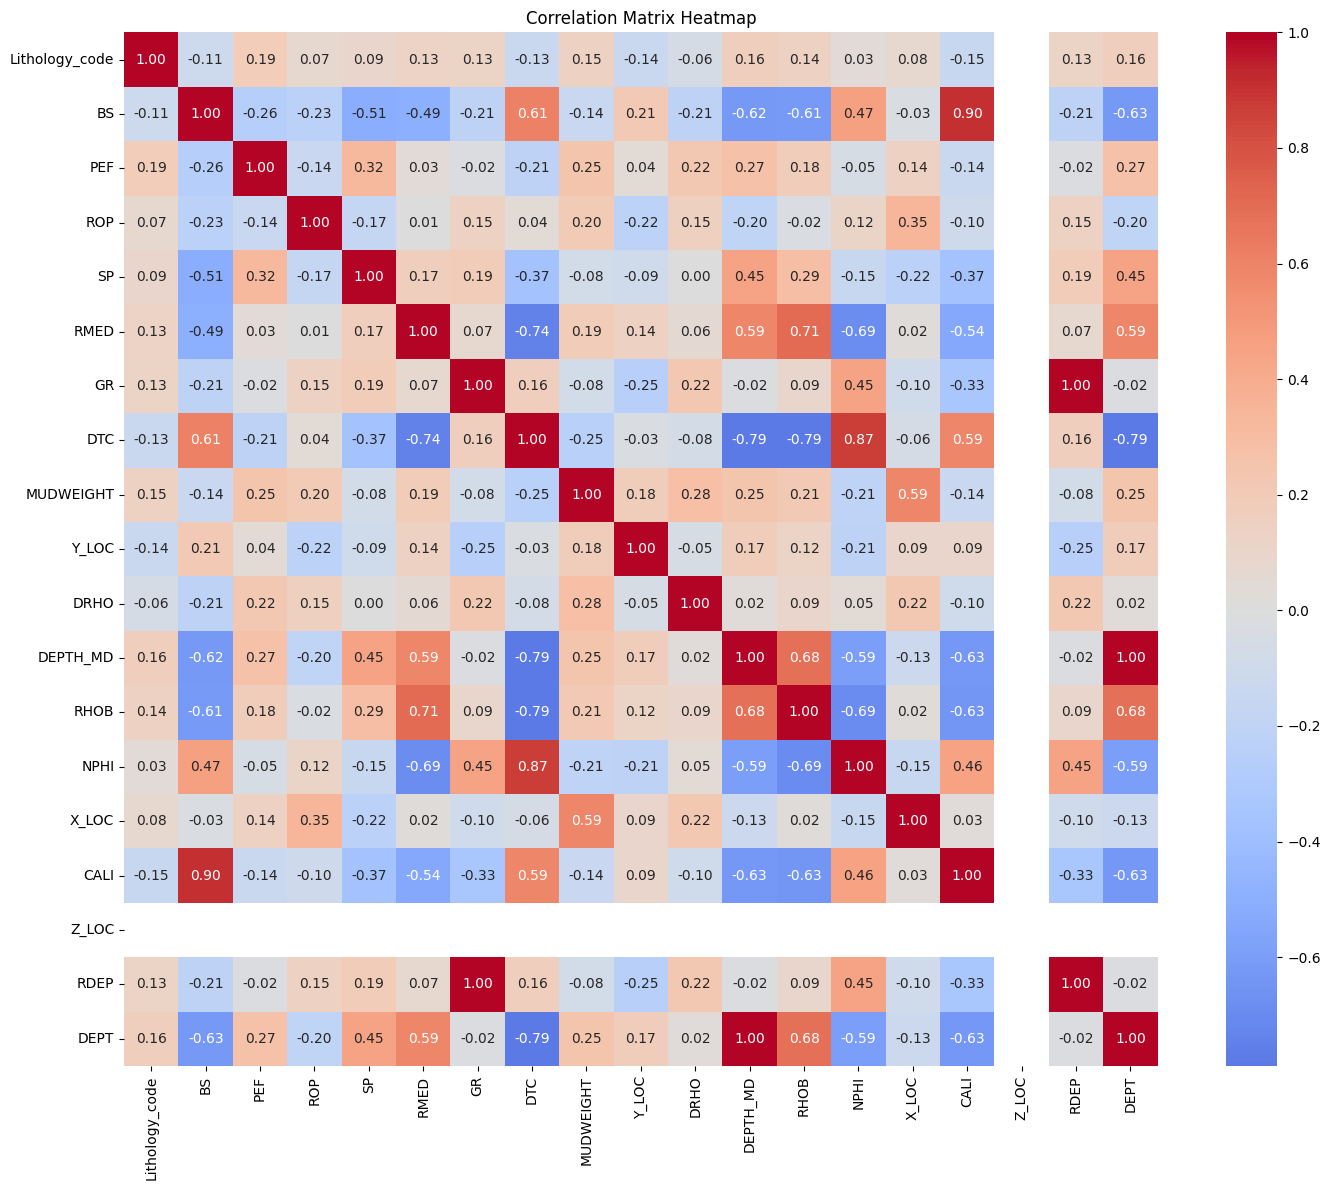

In [26]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = cleaned_dataset.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Format correlation values to 2 decimal places
            square=True)  # Make the plot square-shaped

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

1. **Korelasi Kuat:**
    - NPHI dan RHOB memiliki korelasi negatif kuat (-0.87), yang sangat sesuai dengan prinsip geofisika. Porositas neutron (NPHI) meningkat ketika kepadatan batuan (RHOB) menurun, karena batuan yang lebih porus cenderung kurang padat.
    - GR dan RDEP memiliki korelasi tinggi (0.45), yang menunjukkan bahwa batuan dengan kandungan lempung tinggi (indikasi GR tinggi) cenderung memiliki resistivitas yang lebih rendah (indikasi RDEP rendah).
    - DTC dan RHOB memiliki korelasi positif kuat (0.79), yang juga logis karena batuan yang lebih padat (RHOB tinggi) cenderung memiliki waktu tempuh gelombang kompresional yang lebih rendah (DTC rendah).
    - CALI dan BS memiliki korelasi kuat (0.90), yang wajar karena diameter lubang bor (CALI) sering kali mendekati ukuran bit (BS).

- Korelasi tinggi antara NPHI dan RHOB serta DTC dan RHOB menunjukkan bahwa fitur-fitur ini mungkin redundan. Anda dapat mempertimbangkan untuk mengurangi dimensi (misalnya, dengan PCA) atau memilih salah satu fitur untuk menghindari multicollinearity dalam pemodelan.
- Korelasi antara CALI dan BS menunjukkan bahwa salah satu fitur dapat dihapus jika tidak memberikan informasi tambahan untuk klasifikasi litologi.

2. **Implikasi untuk Missing Values**:
    - Fitur dengan missing values tinggi (misalnya, NPHI 46.42%) memiliki korelasi tinggi dengan fitur lain (misalnya, NPHI dengan RHOB), yang dapat dimanfaatkan untuk imputasi. Anda bisa menggunakan RHOB atau DTC untuk membantu mengimputasi NPHI. Saran menggunakan regresi linear.

---

Saran Keputusan
Berdasarkan insight dari heatmap korelasi, berikut adalah langkah-langkah yang disarankan:

1. **Reduksi Dimensi untuk Fitur yang Redundan**
    - DEPT dan DEPTH_MD (korelasi 1.00): Pilih salah satu, misalnya DEPTH_MD, dan hapus DEPT.
    - CALI dan BS (korelasi 0.90): Pilih salah satu, misalnya CALI, dan hapus BS.
    - NPHI, RHOB, dan DTC (korelasi tinggi): Pertimbangkan untuk menggunakan PCA atau memilih dua fitur saja (misalnya, NPHI dan RHOB).

# **DESCRIPTIVE STATISTIC IN EACH CLASS**